## Preprocessing for Machine Learing in Python

### CHAPTER 1. Introduction to Data Preprocessing

#### 1.1 Introduction to preprocessing

* It comes after exploratory data analysis and data cleaning
* It is a process of preparing data for modeling
* Example:
    * transforming categorical features into numerical features (dummy variables)
    * removing missing data

Why preprocess?
* Transform dataset so it's suitable for modeling
* Improve model performance
* Generate more reliable results

Recap: exploring data with pandas
* check data with *.head()*
* check data information with *.info()*
* check summary statistics with *.describe()*


In [1]:
# exploring missing data
import pandas as pd

volunteer = pd.read_csv('8_datasets/volunteer.csv')
print(volunteer.head())
print(volunteer.isna().sum())
print(volunteer.shape)

   opportunity_id  content_id  vol_requests  event_time  \
0            4996       37004            50           0   
1            5008       37036             2           0   
2            5016       37143            20           0   
3            5022       37237           500           0   
4            5055       37425            15           0   

                                               title  hits  \
0  Volunteers Needed For Rise Up & Stay Put! Home...   737   
1                                       Web designer    22   
2      Urban Adventures - Ice Skating at Lasker Rink    62   
3  Fight global hunger and support women farmers ...    14   
4                                      Stop 'N' Swap    31   

                                             summary is_priority  category_id  \
0  Building on successful events last summer and ...         NaN          NaN   
1             Build a website for an Afghan business         NaN          1.0   
2  Please join us and the stu

In [2]:
# dropping missing data
# drop 'Latitude' and 'Longitude' columns
volunteer_cols = volunteer.drop(['Latitude', 'Longitude'], axis=1)

# drop rows with missing 'category_desc' column
volunteer_subset = volunteer_cols.dropna(subset=['category_desc'])

print(volunteer_subset.shape)

(617, 33)


#### 1.2 Working with data types

Common data types:
* 'object': string/mixed types
* 'int64': integer
* 'float64': float
* 'datetime64': dates and times

Converting column types:
* *astype()* method to specify data type

In [3]:
# exploring data types
import pandas as pd
volunteer = pd.read_csv('8_datasets/volunteer.csv')
print(volunteer.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665 entries, 0 to 664
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   opportunity_id      665 non-null    int64  
 1   content_id          665 non-null    int64  
 2   vol_requests        665 non-null    int64  
 3   event_time          665 non-null    int64  
 4   title               665 non-null    object 
 5   hits                665 non-null    int64  
 6   summary             665 non-null    object 
 7   is_priority         62 non-null     object 
 8   category_id         617 non-null    float64
 9   category_desc       617 non-null    object 
 10  amsl                0 non-null      float64
 11  amsl_unit           0 non-null      float64
 12  org_title           665 non-null    object 
 13  org_content_id      665 non-null    int64  
 14  addresses_count     665 non-null    int64  
 15  locality            595 non-null    object 
 16  region  

In [4]:
# converting a column type -> 'hits'
print(volunteer['hits'].head())
volunteer['hits'] = volunteer['hits'].astype('int64')
print(volunteer['hits'].dtypes)

0    737
1     22
2     62
3     14
4     31
Name: hits, dtype: int64
int64


#### 1.3 Training and test sets

Why split?
* Reduces over-fitting
* Evaluate performance on a holdout set
* *train_test_split()* method to split
* *stratify* parameter to avoid class imbalance


In [5]:
# class imbalance
import pandas as pd
volunteer = pd.read_csv('8_datasets/volunteer.csv')

# check class distribution
print(volunteer['category_desc'].value_counts())


Strengthening Communities    307
Helping Neighbors in Need    119
Education                     92
Health                        52
Environment                   32
Emergency Preparedness        15
Name: category_desc, dtype: int64


In [6]:
# drop missing value columns
volunteer = volunteer.dropna(axis=1, thresh=600)

# check missing values
print(volunteer.isna().sum())

# fill in these missing values in these three columns:
volunteer['category_id'] = volunteer['category_id'].astype('object')
volunteer['category_id'] = volunteer['category_id'].fillna('bfill')

volunteer['category_desc'] = volunteer['category_desc'].astype('object')
volunteer['category_desc'] = volunteer['category_desc'].fillna('bfill')

volunteer['postalcode'] = volunteer['postalcode'].astype('object')
volunteer['postalcode'] = volunteer['postalcode'].fillna('bfill')
# check missing values again
print(volunteer.isna().sum())


opportunity_id         0
content_id             0
vol_requests           0
event_time             0
title                  0
hits                   0
summary                0
category_id           48
category_desc         48
org_title              0
org_content_id         0
addresses_count        0
region                 0
postalcode             6
display_url            0
recurrence_type        0
hours                  0
created_date           0
last_modified_date     0
start_date_date        0
end_date_date          0
status                 0
dtype: int64
opportunity_id        0
content_id            0
vol_requests          0
event_time            0
title                 0
hits                  0
summary               0
category_id           0
category_desc         0
org_title             0
org_content_id        0
addresses_count       0
region                0
postalcode            0
display_url           0
recurrence_type       0
hours                 0
created_date          0
last_

In [7]:
# stratified sampling
from sklearn.model_selection import train_test_split

# split data into X and y
X = volunteer.drop(['category_desc'], axis=1)
y = volunteer[['category_desc']]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

print(y_train['category_desc'].value_counts())

# the training set class distribution is the same as original dataset

Strengthening Communities    245
Helping Neighbors in Need     95
Education                     74
Health                        42
bfill                         38
Environment                   26
Emergency Preparedness        12
Name: category_desc, dtype: int64


### CHAPTER 2. Standardizing Data

#### 2.1 Standardization

* It transforms *continuous data* to look *normally distributed*
* 'scikit-learn' models assume normally distributed data
* Using non-normal training data can lead to bias

Two methods of standardization:
1. Log normalization
2. Scaling

When to standardize?
* When working with models that use a linear distance metric or operate in a linear space (e.g: k-nearest neighbors, linear regression, k-means clustering)
* When dataset features have *high variance*
* When dataset features are on *different scales*

In [8]:
# modeling without normalizing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

wine = pd.read_csv('8_datasets/wine.csv')

# split data
X = wine.drop('Type', axis=1)
y = wine['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# fit k-neearest neighbors model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print(knn.score(X_test, y_test))


0.7777777777777778


The result is not very good, let's see how we can improve model performance by standardization.

#### 2.2 Log normalization

* It is useful when features have high variance
* It applies logarithm transformation to the values
* It takes the natural log of each number:
$$ e( \approx 2.718) $$
* It captures relative changes, the magnitude of change, and keeps everything positive
* Use *log()* function from 'numpy' library

In [9]:
# checking the variance
import pandas as pd

wine = pd.read_csv('8_datasets/wine.csv')
print(wine.describe())
# column 'Proline' has extremely high variance

             Type     Alcohol  Malic acid         Ash  Alcalinity of ash  \
count  178.000000  178.000000  178.000000  178.000000         178.000000   
mean     1.938202   13.000618    2.336348    2.366517          19.494944   
std      0.775035    0.811827    1.117146    0.274344           3.339564   
min      1.000000   11.030000    0.740000    1.360000          10.600000   
25%      1.000000   12.362500    1.602500    2.210000          17.200000   
50%      2.000000   13.050000    1.865000    2.360000          19.500000   
75%      3.000000   13.677500    3.082500    2.557500          21.500000   
max      3.000000   14.830000    5.800000    3.230000          30.000000   

        Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.124453   
min     70.000000       0.980000   

In [10]:
# log normlization in Python
import numpy as np

# print variance of column 'Proline'
print(wine['Proline'].var())

# get log normalization variance
wine['Proline_log'] = np.log(wine['Proline'])
print(wine['Proline_log'].var())


99166.71735542436
0.17231366191842012


#### 2.3 Scaling data for feature comparision

* It is useful when features are on different scales
* Model with linear characteristics
* It centers feature around 0 and transform to variance of 1
* It transforms to approximately normal distribution
* Use *StandardScaler()* method from 'sklearn' library

In [11]:
# scaling data
import pandas as pd

wine = pd.read_csv('8_datasets/wine.csv')
print(wine.info())

# check columns statistics
print(wine.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Type                          178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [12]:
# standardizing columns
from sklearn.preprocessing import StandardScaler

# create scaler
scaler = StandardScaler()

# get subset
cols=['Ash', 'Alcalinity of ash', 'Magnesium']
wine_subset = wine[cols]

# apply scaler
wine_subset_scaled = scaler.fit_transform(wine_subset)

#### 2.4 Standardized data and modeling

Recall:
* k-nearest neighbors is a model classifies data based on its distance on training set data
* New data is assigned a label based on the class that majority of surrounding data points belong to
* It is important to **split the data before preprocessing**, so none of the test data is used to train the model

In [13]:
# KNN on non-scaled data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

wine = pd.read_csv('8_datasets/wine.csv')

# split the dataset
X = wine.drop('Type', axis=1)
y = wine['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# create KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# get score
print('KNN on unscaled data:')
print(knn.score(X_test, y_test))

KNN on unscaled data:
0.7777777777777778


In [14]:
# KNN on scaled data
from sklearn.preprocessing import StandardScaler

# use the same dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# create scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# create model
knn.fit(X_train_scaled, y_train)

# get score
print('KNN on scaled data:')
print(knn.score(X_test_scaled, y_test))

KNN on scaled data:
0.9333333333333333


There is a significant improvement on model performance after scaling data!

### CHAPTER 3. Feature Engineering

#### 3.1 Feature Engineering

* It is creation of new features from existing ones
* Advantages:
    1. Add more information to the dataset
    2. Improve model performance
    3. Add more insight into relationships between features
* You need to know your data first!
* It is highly dataset-dependent, each dataset might require different feature engineering

Scenarios of using feature engineering:
1. text data  -> natural language processing (NLP)
2. date and time data -> split time and data


In [15]:
# identify areas for feature engineering
import pandas as pd
volunteer = pd.read_csv('8_datasets/volunteer.csv')
# check the columns you might want to perform a feature engineering task on
# columns include 'created_date', 'title', 'category_desc'
# these columns are text data and date and time data
cols = ['created_date', 'title', 'category_desc']
subset = volunteer[cols]
print(subset.head())


      created_date                                              title  \
0  January 13 2011  Volunteers Needed For Rise Up & Stay Put! Home...   
1  January 14 2011                                       Web designer   
2  January 19 2011      Urban Adventures - Ice Skating at Lasker Rink   
3  January 21 2011  Fight global hunger and support women farmers ...   
4  January 28 2011                                      Stop 'N' Swap   

               category_desc  
0                        NaN  
1  Strengthening Communities  
2  Strengthening Communities  
3  Strengthening Communities  
4                Environment  


#### 3.2 Encoding categorical variables

* In models, categorical variables need to converted to numerical variables
* Encoding scenarios:
1. Encoding binary categorical variables
    (1) 'pandas' method -> use *apply* and write a conditional that returns 1 and 0 respectively
    (2) 'sklearn' method -> *LabelEncoder()* method
2. One-hot Encoding: a list of 0s and 1s to represent multiple values that more than 2
    (1) 'pandas' method -> *get_dummies()* method


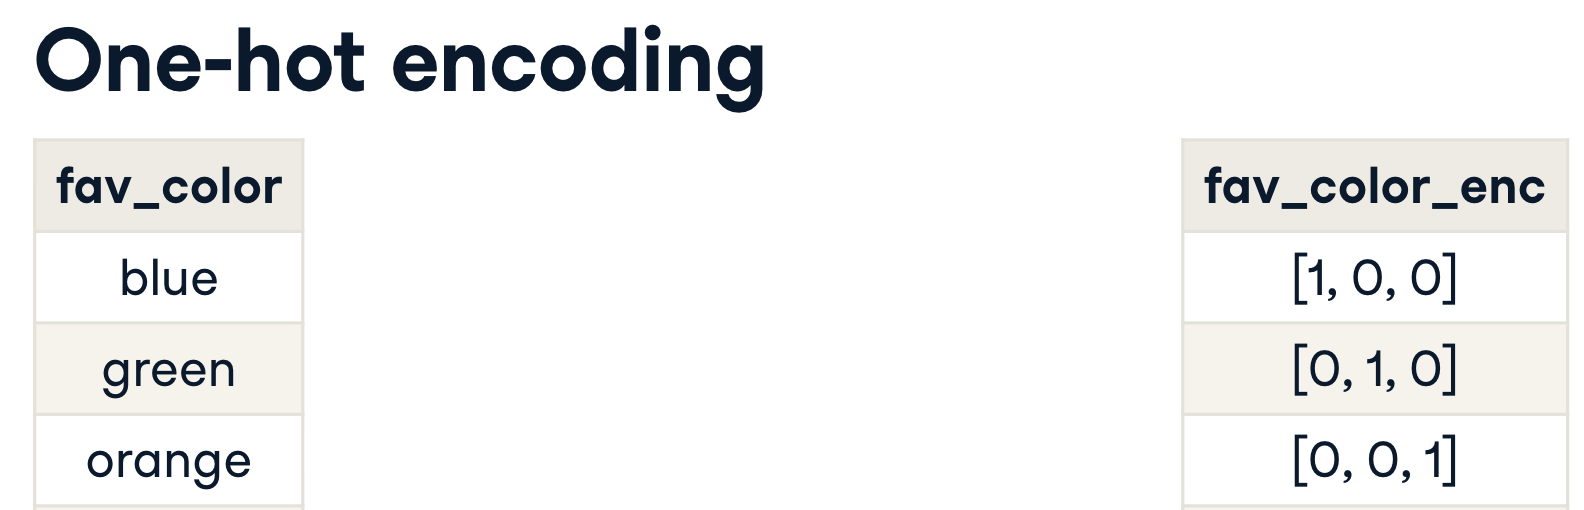

In [16]:
# display image
from IPython import display
display.Image('Images/8_one_hot_encoding.PNG')

In [17]:
# encoding categorical variables - binary
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# get dataset
hiking = pd.read_json('8_datasets/hiking.json')

# encode column 'Accessible'
enc = LabelEncoder()
hiking['Accessible_enc'] = enc.fit_transform(hiking['Accessible'])

# compare two columns
print(hiking[['Accessible', 'Accessible_enc']].head())

  Accessible  Accessible_enc
0          Y               1
1          N               0
2          N               0
3          N               0
4          N               0


In [18]:
# encoding categorical variables - one-hot
# with 'get_dummies' method from 'pandas' library
import pandas as pd

# get dataset
volunteer = pd.read_csv('8_datasets/volunteer.csv')

# encode column 'category_desc'
category_enc = pd.get_dummies(volunteer['category_desc'])
print(category_enc.head())


   Education  Emergency Preparedness  Environment  Health  \
0          0                       0            0       0   
1          0                       0            0       0   
2          0                       0            0       0   
3          0                       0            0       0   
4          0                       0            1       0   

   Helping Neighbors in Need  Strengthening Communities  
0                          0                          0  
1                          0                          1  
2                          0                          1  
3                          0                          1  
4                          0                          0  


#### 3.3 Engineering numerical features

* Even numerical features need feature engineering sometimes
* It will add more value to model's performance

* Scenarios of numerical engineering:
1. Aggregate statistics -> e.g: mean, median
2. Dates -> e.g: extract year, month ,day

In [20]:
# aggregating numerical columns
import pandas as pd

# making data by hand
name = ['Sue', 'Mark', 'Sean', 'Erin', 'Jenny', 'Russell']
run1 = [20.1, 16.5, 23.5, 21.7, 25.8, 30.9]
run2 = [18.5, 17.1, 25.1, 21.1, 27.1, 29.6]
run3 = [19.6, 16.9, 25.2, 20.9, 26.1, 31.4]
run4 = [20.3, 17.6, 24.6, 22.1, 26.7, 30.4]
run5 = [18.3, 17.3, 23.9, 22.2, 26.9, 29.9]

running_times_5k = pd.DataFrame({'name':name, 'run1':run1, 'run2':run2, 'run3':run3, 'run4':run4, 'run5':run5})

# create average column
run_columns = ['run1', 'run2','run3', 'run4', 'run5']
running_times_5k['mean'] = running_times_5k.apply(lambda row:row[run_columns].mean(), axis=1)
print(running_times_5k.head())

    name  run1  run2  run3  run4  run5   mean
0    Sue  20.1  18.5  19.6  20.3  18.3  19.36
1   Mark  16.5  17.1  16.9  17.6  17.3  17.08
2   Sean  23.5  25.1  25.2  24.6  23.9  24.46
3   Erin  21.7  21.1  20.9  22.1  22.2  21.60
4  Jenny  25.8  27.1  26.1  26.7  26.9  26.52


In [22]:
# extracting datetime components
import pandas as pd

# get dataset
volunteer = pd.read_csv('8_datasets/volunteer.csv')

# extract month from column 'start_date'
volunteer['start_date_converted'] = pd.to_datetime(volunteer['start_date_date'])
volunteer['start_date_month'] = volunteer['start_date_converted'].dt.month
print(volunteer[['start_date_converted', 'start_date_month']].head())

  start_date_converted  start_date_month
0           2011-07-30                 7
1           2011-02-01                 2
2           2011-01-29                 1
3           2011-02-14                 2
4           2011-02-05                 2


#### 3.4 Engineering text features

*